## Computational Physics, Homework #1 
## Wes Roberts

In [1]:
#Define the euler function and constants

%matplotlib inline
import numpy as np
from matplotlib import pyplot 

T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

def euler(y, f, dx):
    return y + f*dx

In [2]:
my_temp = np.zeros(nsteps)
my_time = np.zeros(nsteps)

T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
    my_time[i] = i*dt

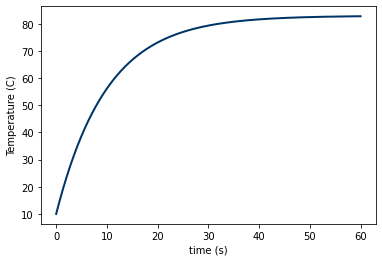

In [3]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=2)
pyplot.xlabel('time (s)')
pyplot.ylabel('Temperature (C)');

#Just checking that the function does what I think it does!

Now do the actual assignment

In [4]:
dt = 1.    # initializing the time slice at 1 second
my_color = ['red', 'green', 'blue', 'black']     # creating a list with the color names
T0 = 10
tmax = 10  # since we're interested in 10 seconds, it will be convenient if this is the final value in each time array

loops = 20

temps_at_10 = np.zeros(loops)    # Create an array that will contain the values of temperature at t = 10
#print(temps_at_10)

timeslice = np.zeros(loops)    # Create an array that will contain the dt for each trial
logtime = np.zeros(loops)    # Create an array that will contain the logarithm of each timestep

for j in range(0,loops):
    nsteps = int(tmax/dt)    # need to do this differently for each value of dt
    my_time = np.linspace(dt,tmax,nsteps)    # construct a time array on each loop
    
    print(f'the final time in the array is {my_time[-1]} seconds')
    
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):    # nest another loop that constructs the temperature array for that dt
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
    #print(my_temp[-1])
    
    temps_at_10[j] = my_temp[-1]
    timeslice[j] = dt
    logtime[j] = np.log(dt)
    
    print(f'temp at ten seconds is {temps_at_10[j]} for dt = {timeslice[j]}')
    print('')
    
    dt = dt/2.   # At the end of the loop, divide the timeslice in half before repeating

the final time in the array is 10.0 seconds
temp at ten seconds is 57.5464738727 for dt = 1.0

the final time in the array is 10.0 seconds
temp at ten seconds is 56.830527664176415 for dt = 0.5

the final time in the array is 10.0 seconds
temp at ten seconds is 56.48403188818471 for dt = 0.25

the final time in the array is 10.0 seconds
temp at ten seconds is 56.31352548456047 for dt = 0.125

the final time in the array is 10.0 seconds
temp at ten seconds is 56.22894252554225 for dt = 0.0625

the final time in the array is 10.0 seconds
temp at ten seconds is 56.18681676580647 for dt = 0.03125

the final time in the array is 10.0 seconds
temp at ten seconds is 56.16579508880537 for dt = 0.015625

the final time in the array is 10.0 seconds
temp at ten seconds is 56.15529452282407 for dt = 0.0078125

the final time in the array is 10.0 seconds
temp at ten seconds is 56.15004680445006 for dt = 0.00390625

the final time in the array is 10.0 seconds
temp at ten seconds is 56.14742358597882

Now plot the value of temperature at 10 seconds against the dt used in that trial

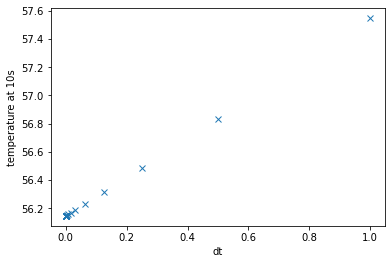

In [5]:
pyplot.plot(timeslice, temps_at_10, 'x');
pyplot.xlabel('dt')
pyplot.ylabel('temperature at 10s');

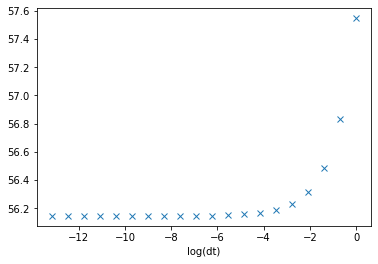

In [6]:
pyplot.plot(logtime, temps_at_10, 'x')
pyplot.xlabel('log(dt)');

The log plot makes the convergence much easier to see. It's converging to a value near 56.1448. From the linear plot, we see that it does so roughly linearly in dt. 

Now repeat for a single dt and compare with exact result.

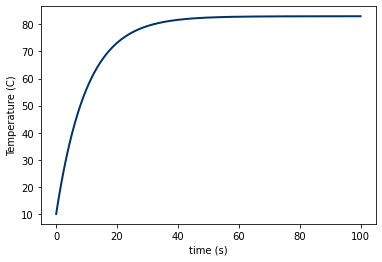

In [7]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = .05  # time step
tmax = 100. # maximum time
nsteps = int(tmax/dt)  # number of steps

my_temp = np.zeros(nsteps)
my_time = np.zeros(nsteps)

T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
    my_time[i] = i*dt
    
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=2)
pyplot.xlabel('time (s)')
pyplot.ylabel('Temperature (C)');   


Before going on I want to check that my analytic result matches my numerical plot.

82.99666919265641
82.99675166156496


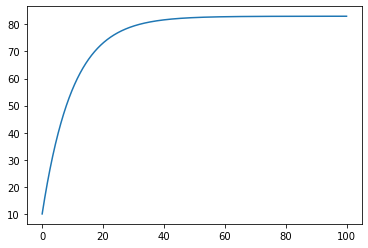

In [8]:
T_an = (T0 - Ts)*np.exp(-r*my_time) + Ts
print(T_an[-1])
print(my_temp[-1])
pyplot.plot(my_time, T_an);

Qualitatively looks pretty good, so now plot the difference between the two (the numerical error) over time.

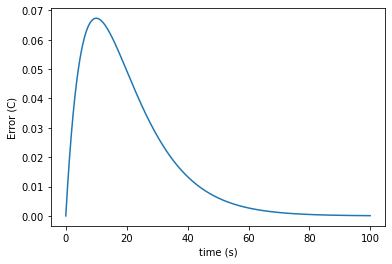

In [9]:
err = my_temp - T_an
pyplot.plot(my_time, err)
pyplot.xlabel('time (s)')
pyplot.ylabel('Error (C)');

In [10]:
print(err[-10:-1])


[8.58812169e-05 8.54952898e-05 8.51110754e-05 8.47285664e-05
 8.43477552e-05 8.39686345e-05 8.35911968e-05 8.32154348e-05
 8.28413411e-05]


What changes as I vary dt is this peak in the error, rather than the asymptote that is reached eventually. This makes sense: given enough iterations the error shouldn't really care what the timestep was. I will show this below.

First: show that the value of the peak changes by plotting this error for different dt.

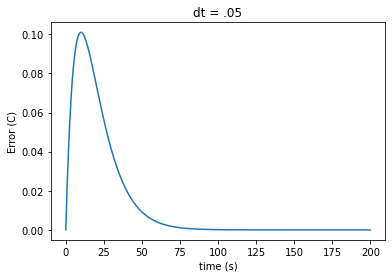

In [11]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = .075  # time step
tmax = 200. # maximum time
nsteps = int(tmax/dt)  # number of steps

my_temp = np.zeros(nsteps)
my_time = np.zeros(nsteps)

T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
    my_time[i] = i*dt
    
T_an = (T0 - Ts)*np.exp(-r*(my_time)) + Ts

err = np.absolute(my_temp - T_an)
pyplot.plot(my_time, err)
pyplot.xlabel('time (s)')
pyplot.ylabel('Error (C)');
pyplot.title('dt = .05');

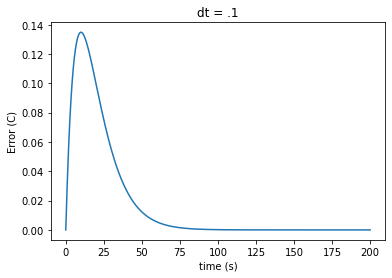

In [12]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = .1  # time step
tmax = 200. # maximum time
nsteps = int(tmax/dt)  # number of steps

my_temp = np.zeros(nsteps)
my_time = np.zeros(nsteps)

T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
    my_time[i] = i*dt
    
T_an = (T0 - Ts)*np.exp(-r*(my_time)) + Ts

err = np.absolute(my_temp - T_an)
pyplot.plot(my_time, err)
pyplot.xlabel('time (s)')
pyplot.ylabel('Error (C)');
pyplot.title('dt = .1');

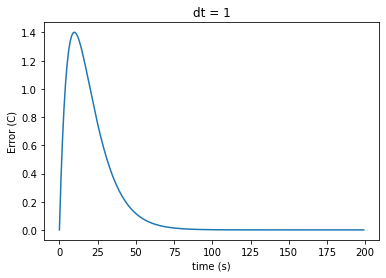

In [13]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 1.  # time step
tmax = 200. # maximum time
nsteps = int(tmax/dt)  # number of steps

my_temp = np.zeros(nsteps)
my_time = np.zeros(nsteps)

T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
    my_time[i] = i*dt
    
T_an = (T0 - Ts)*np.exp(-r*(my_time)) + Ts

err = my_temp - T_an
pyplot.plot(my_time, err)
pyplot.xlabel('time (s)')
pyplot.ylabel('Error (C)')
pyplot.title('dt = 1');

Clearly the peak in the error grows as we increase dt. 

Now check asymptotic behavior of the error for two values of dt.

the error converges to -5.684341886080802e-14
[-5.68434189e-14 -5.68434189e-14 -5.68434189e-14 -5.68434189e-14
 -5.68434189e-14 -5.68434189e-14 -5.68434189e-14 -5.68434189e-14
 -5.68434189e-14]


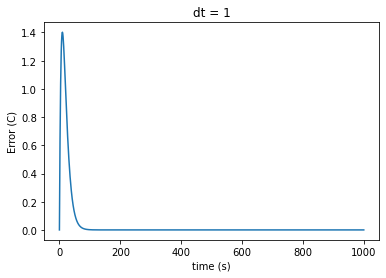

In [14]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 1.  # time step
tmax = 1000. # maximum time
nsteps = int(tmax/dt)  # number of steps

my_temp = np.zeros(nsteps)
my_time = np.zeros(nsteps)

T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
    my_time[i] = i*dt
    
T_an = (T0 - Ts)*np.exp(-r*(my_time)) + Ts

err = my_temp - T_an
pyplot.plot(my_time, err)
pyplot.xlabel('time (s)')
pyplot.ylabel('Error (C)')
pyplot.title('dt = 1');
print(f'the error converges to {err[-1]}')
print(err[-10:-1])

the error converges to 1.4210854715202004e-12
[1.42108547e-12 1.42108547e-12 1.42108547e-12 1.42108547e-12
 1.42108547e-12 1.42108547e-12 1.42108547e-12 1.42108547e-12
 1.42108547e-12]


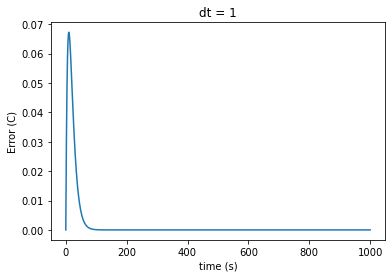

In [15]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 1000. # maximum time
nsteps = int(tmax/dt)  # number of steps

my_temp = np.zeros(nsteps)
my_time = np.zeros(nsteps)

T = T0
my_temp[0] = T0
for i in range(1, nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
    my_time[i] = i*dt
    
T_an = (T0 - Ts)*np.exp(-r*(my_time)) + Ts

err = np.absolute(T_an - my_temp)
pyplot.plot(my_time, err)
pyplot.xlabel('time (s)')
pyplot.ylabel('Error (C)')
pyplot.title('dt = 1');
print(f'the error converges to {err[-1]}')
print(err[-10:-1])

Oddly, larger dt seems to make the peak higher and the value on the tail lower. The peak was not expected - I was anticipating the error to grow with time. This seems to suggest that after an initial period, the numerical calculation gets better again before reaching an asymptote that is very near zero. I am wondering if the way I coded my analytical solution results in error propagating through there as well, so that it is in some sense not exact but becomes "just as bad" as the numerical solution, given enough time?